In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import matplotlib.dates as mdates

In [178]:
df = pd.read_csv('./data/007_BuyWaits_v1.csv')

In [179]:
df['BusinessDate'] = pd.to_datetime(df['BusinessDate'])
df['BusinessHour'] = df['BusinessHour'].astype(int)
df['var365_BuyWaitMin'] = df['avg_BuyWaitMin'] - df['avg365day_BuyWaitMin']

In [180]:
filt_Dates = (df['BusinessDate'] >= '1/1/2019') & (df['BusinessDate'] < '1/1/2020')
filt_Hours = (df['BusinessHour'] > 8) & (df['BusinessHour'] < 23) 
df_hm = df[filt_Dates & filt_Hours][['BusinessHour', 'BusinessDate', 'var365_BuyWaitMin']].pivot('BusinessHour', 'BusinessDate', 'var365_BuyWaitMin').fillna(dict_ColFillVals, axis=0)
list_Cols = df_hm.columns
dict_ColFillVals = dict(zip(list_Cols, [0 for c in list_Cols]))
df_hm = df_hm.fillna(dict_ColFillVals, axis=0)
df_hm.rename(columns = dict(zip(df_hm.columns, [d.strftime('%F') for d in df_hm.columns])), inplace=True)

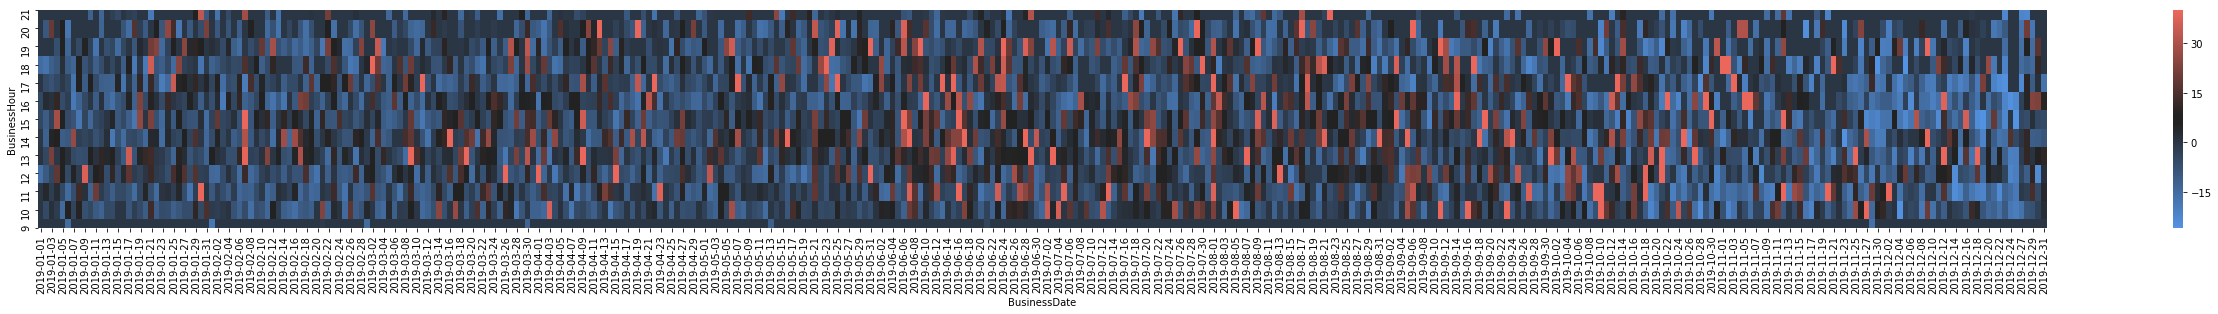

In [185]:
pal=sns.diverging_palette(250, 15, s=75, l=60, n=9, center="dark", as_cmap=True)
fig, ax = plt.subplots(figsize=(45,4))
ax=sns.heatmap(df_hm, vmax=40, cmap=pal)
ax.invert_yaxis()
plt.show()